# **Analisis Data Penelitian Lele**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## **Data Gathering**

In [2]:
excel = pd.read_excel(
    "https://github.com/nurfianqodar/analisis_data_lele/raw/main/data_percobaan_lele_maggot.xlsx",
    sheet_name=["DATA PANJANG DAN LEBAR", "DATA BOBOT"],
)

In [3]:
raw_df_pl = excel["DATA PANJANG DAN LEBAR"].reset_index()
raw_df_bobot = excel["DATA BOBOT"].reset_index()

_Beberapa Sample Data Panjang dan Lebar_

In [4]:
raw_df_pl.sample(5)

,index,Identifier,Date,Width (cm),Length (cm)
1,1,A1,2024-07-31,4.0,23.0
162,162,B5,2024-08-14,3.0,21.0
28,28,B3,2024-07-31,3.0,20.0
64,64,C1,2024-08-07,3.5,22.0
37,37,B5,2024-07-31,3.0,16.0


_Beberapa Sample Data Bobot_

In [5]:
raw_df_bobot.sample(5)

,index,Identifier,Date,Weight (gram)
3,3,A2,2024-08-07,250
27,27,C4,2024-08-07,260
16,16,B4,2024-07-31,350
25,25,C3,2024-08-07,290
30,30,A1,2024-08-14,280


### Menambahkan Kolom Perlakuan Dan Ulangan Sesuai Identifier

_Menghapus kolom "Identifier" (tIdak diperlukan dalam analisis)_

_Mengganti semua nama kolom kedalam snake case_

**Keterangan Treatment**
- TA : Perlakuan A
- TB : Perlakuan B
- TC : Perlakuan C

**Keterangan Repetition**
- R1 : Ulangan Ke-1
- R2 : Ulangan Ke-2
- R3 : Ulangan Ke-3
- R4 : Ulangan Ke-4
- R5 : Ulangan Ke-5

In [6]:
def create_treatment_repetition(identifier):
    treatment = f"T{identifier[0]}"
    repetition = f"R{identifier[1]}"
    return treatment, repetition

In [7]:
raw_df_bobot[["treatment", "repetition"]] = (
    raw_df_bobot["Identifier"].apply(create_treatment_repetition).apply(pd.Series)
)
raw_df_bobot.drop(columns=["Identifier"], inplace=True)
raw_df_bobot.sample(5)

,index,Date,Weight (gram),treatment,repetition
23,23,2024-08-07,160,TC,R2
28,28,2024-07-31,290,TC,R5
38,38,2024-08-14,220,TB,R3
40,40,2024-08-14,300,TB,R5
16,16,2024-07-31,350,TB,R4


In [8]:
bobot_col_rename = {"Date": "date", "Weight (gram)": "weight_in_gram"}

raw_df_bobot = raw_df_bobot.rename(columns=bobot_col_rename)
raw_df_bobot.sample(5)

,index,date,weight_in_gram,treatment,repetition
6,6,2024-07-31,350,TA,R4
39,39,2024-08-14,250,TC,R3
21,21,2024-08-07,250,TC,R1
31,31,2024-08-14,240,TC,R1
24,24,2024-07-31,310,TC,R3


In [9]:
raw_df_pl[["treatment", "repetition"]] = (
    raw_df_pl["Identifier"].apply(create_treatment_repetition).apply(pd.Series)
)

raw_df_pl.drop(columns=["Identifier"], inplace=True)
raw_df_pl.sample(5)

,index,Date,Width (cm),Length (cm),treatment,repetition
130,130,2024-08-14,2.5,17.0,TA,R4
51,51,2024-07-31,3.0,20.0,TC,R3
164,164,2024-08-14,4.0,24.0,TA,R2
141,141,2024-08-14,2.5,17.0,TA,R3
11,11,2024-07-31,3.0,18.0,TA,R3


In [10]:
pl_col_rename = {
    "Date": "date",
    "Width (cm)": "width_in_cm",
    "Length (cm)": "length_in_cm",
}
raw_df_pl = raw_df_pl.rename(columns=pl_col_rename)
raw_df_pl.sample(5)

,index,date,width_in_cm,length_in_cm,treatment,repetition
56,56,2024-07-31,2.0,16.0,TC,R5
33,33,2024-07-31,2.0,16.0,TB,R4
157,157,2024-08-14,2.5,18.0,TC,R3
73,73,2024-08-07,2.0,18.5,TB,R4
107,107,2024-08-07,4.0,24.0,TA,R2


## **Analisis Data Panjang Lele**

In [11]:
df_panjang = raw_df_pl[["index", "date", "treatment", "repetition", "length_in_cm"]]
df_panjang.sample(5)

,index,date,treatment,repetition,length_in_cm
107,107,2024-08-07,TA,R2,24.0
13,13,2024-07-31,TA,R4,20.0
69,69,2024-08-07,TA,R4,21.0
87,87,2024-08-07,TC,R2,20.0
178,178,2024-08-14,TA,R5,19.0


### Rata-Rata Panjang Pada Setiap Perlakuan

In [12]:
panjang_mean = (
    df_panjang.groupby(by=["date", "treatment"])["length_in_cm"].mean().reset_index()
)

panjang_mean

,date,treatment,length_in_cm
0,2024-07-31,TA,18.400
1,2024-07-31,TB,18.450
2,2024-07-31,TC,19.650
3,2024-08-07,TA,18.925
4,2024-08-07,TB,20.000
5,2024-08-07,TC,20.750
6,2024-08-14,TA,19.150
7,2024-08-14,TB,21.300
8,2024-08-14,TC,19.800


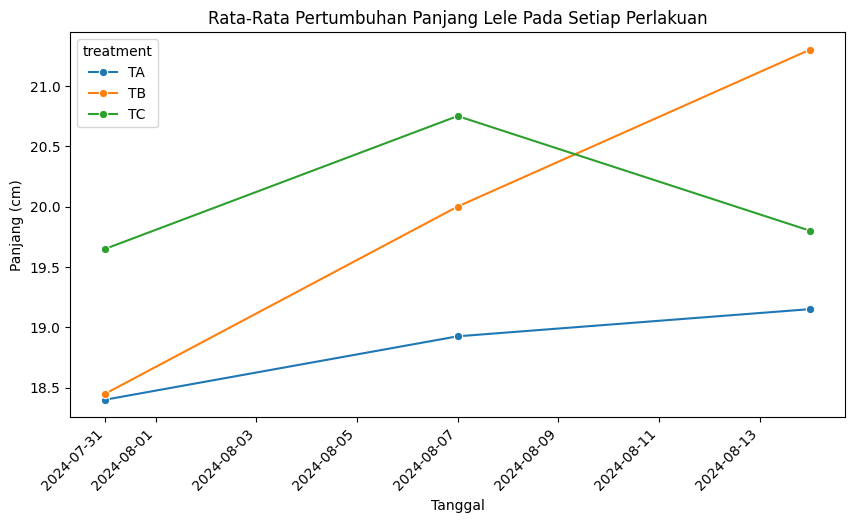

In [13]:
plt.figure(figsize=(10, 5))

sns.lineplot(data=panjang_mean, x="date", y="length_in_cm", hue="treatment", marker="o")

plt.title("Rata-Rata Pertumbuhan Panjang Lele Pada Setiap Perlakuan")
plt.xlabel("Tanggal")
plt.xticks(rotation=45, ha="right")
plt.ylabel("Panjang (cm)")

plt.show()

### Nilai Statistik Pada Panjang Lele

In [14]:
df_panjang.groupby(["date", "treatment"])["length_in_cm"].describe(include="all")

count    mean       std   min     25%    50%     75%  \
date       treatment                                                         
2024-07-31 TA          20.0  18.400  1.846761  16.0  17.000  18.50  19.250   
           TB          20.0  18.450  2.480980  16.0  16.750  18.00  19.250   
           TC          20.0  19.650  3.528456  14.0  16.000  19.50  21.250   
2024-08-07 TA          20.0  18.925  2.903152  15.0  16.875  18.25  20.125   
           TB          20.0  20.000  2.660629  16.5  17.875  19.75  21.500   
           TC          20.0  20.750  3.544826  16.5  18.000  20.00  22.125   
2024-08-14 TA          20.0  19.150  2.777257  15.0  17.000  19.00  20.250   
           TB          20.0  21.300  2.975337  17.0  19.000  20.50  23.250   
           TC          20.0  19.800  2.117595  17.0  18.000  19.50  20.250   

                       max  
date       treatment        
2024-07-31 TA         23.0  
           TB         24.0  
           TC         27.0  
2024-08-07 TA         26.0  
           TB         25.0  
           TC         29.0  
2024-08-14 TA         26.0  
           TB         27.0  
           TC         25.0

## **Analisis Data Lebar Lele**

In [15]:
df_lebar = raw_df_pl[["index", "date", "treatment", "repetition", "width_in_cm"]]
df_lebar.sample(5)

,index,date,treatment,repetition,width_in_cm
118,118,2024-08-07,TB,R3,2.0
81,81,2024-08-07,TA,R3,2.0
54,54,2024-07-31,TC,R4,3.0
125,125,2024-08-14,TC,R1,2.5
8,8,2024-07-31,TA,R3,3.0


### Rata-Rata Lebar Pada Setiap Perlakuan

In [16]:
lebar_mean = (
    df_lebar.groupby(by=["date", "treatment"])["width_in_cm"].mean().reset_index()
)

lebar_mean

,date,treatment,width_in_cm
0,2024-07-31,TA,2.700
1,2024-07-31,TB,2.500
2,2024-07-31,TC,2.700
3,2024-08-07,TA,2.725
4,2024-08-07,TB,3.025
5,2024-08-07,TC,2.950
6,2024-08-14,TA,2.850
7,2024-08-14,TB,3.125
8,2024-08-14,TC,2.950


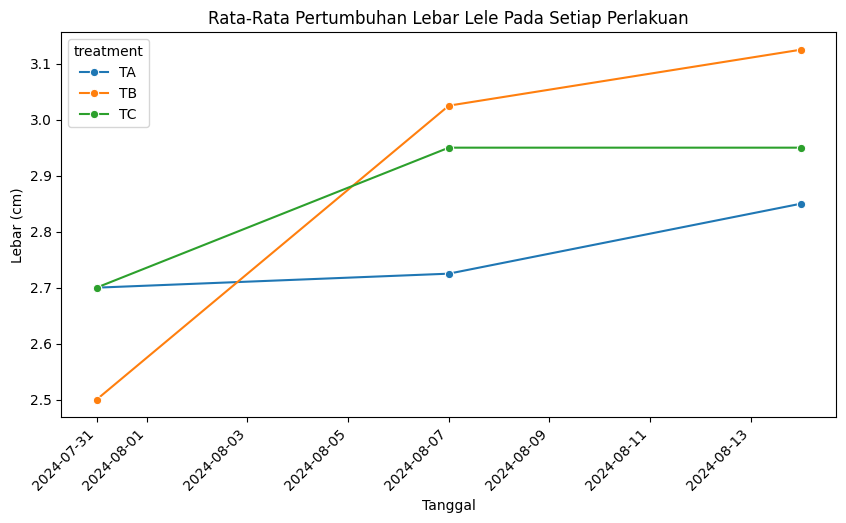

In [17]:
plt.figure(figsize=(10, 5))

sns.lineplot(data=lebar_mean, x="date", y="width_in_cm", hue="treatment", marker="o")

plt.title("Rata-Rata Pertumbuhan Lebar Lele Pada Setiap Perlakuan")
plt.xlabel("Tanggal")
plt.xticks(rotation=45, ha="right")
plt.ylabel("Lebar (cm)")

plt.show()

### Nilai Statistik Pada Lebar Lele

In [18]:
df_lebar.groupby(["date", "treatment"])["width_in_cm"].describe(include="all")

count   mean       std  min    25%  50%    75%  max
date       treatment                                                     
2024-07-31 TA          20.0  2.700  0.656947  2.0  2.000  3.0  3.000  4.0
           TB          20.0  2.500  0.512989  2.0  2.000  2.5  3.000  3.0
           TC          20.0  2.700  0.656947  2.0  2.000  3.0  3.000  4.0
2024-08-07 TA          20.0  2.725  0.658447  2.0  2.000  3.0  3.000  4.0
           TB          20.0  3.025  0.678136  2.0  2.500  3.0  3.250  4.0
           TC          20.0  2.950  0.686333  2.0  2.375  3.0  3.500  4.0
2024-08-14 TA          20.0  2.850  0.564288  2.0  2.500  2.5  3.125  4.0
           TB          20.0  3.125  0.483273  2.5  3.000  3.0  3.500  4.0
           TC          20.0  2.950  0.426121  2.5  2.500  3.0  3.000  4.0

## **Analisis Data Bobot Lele**

In [19]:
df_bobot = raw_df_bobot[["index", "date", "treatment", "repetition", "weight_in_gram"]]
df_bobot.sample(5)

,index,date,treatment,repetition,weight_in_gram
25,25,2024-08-07,TC,R3,290
16,16,2024-07-31,TB,R4,350
7,7,2024-08-07,TA,R4,200
30,30,2024-08-14,TA,R1,280
8,8,2024-07-31,TA,R5,250


In [20]:
bobot_mean = (
    df_bobot.groupby(by=["date", "treatment"])["weight_in_gram"].mean().reset_index()
)

bobot_mean

,date,treatment,weight_in_gram
0,2024-07-31,TA,282.0
1,2024-07-31,TB,258.0
2,2024-07-31,TC,314.0
3,2024-08-07,TA,214.0
4,2024-08-07,TB,246.0
5,2024-08-07,TC,236.0
6,2024-08-14,TA,194.0
7,2024-08-14,TB,258.0
8,2024-08-14,TC,216.0


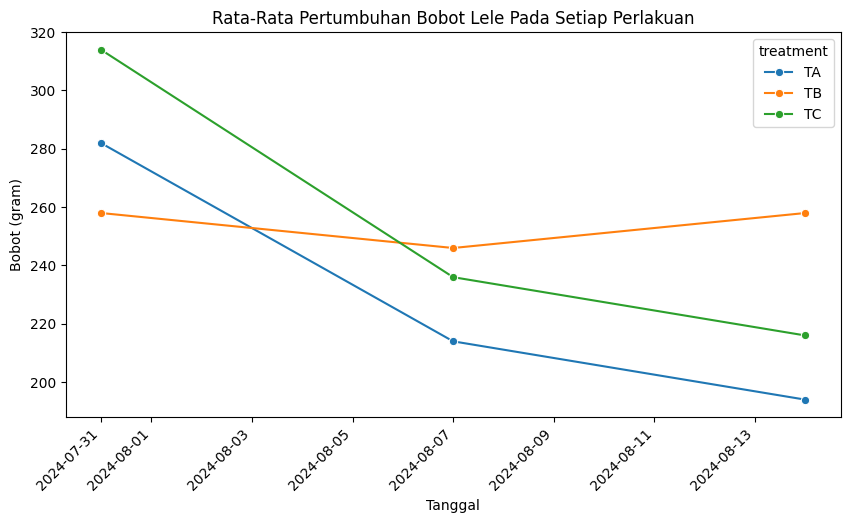

In [21]:
plt.figure(figsize=(10, 5))

sns.lineplot(data=bobot_mean, x="date", y="weight_in_gram", hue="treatment", marker="o")

plt.title("Rata-Rata Pertumbuhan Bobot Lele Pada Setiap Perlakuan")
plt.xlabel("Tanggal")
plt.xticks(rotation=45, ha="right")
plt.ylabel("Bobot (gram)")

plt.show()

### Nilai Statistik Pada Bobot Lele

In [22]:
df_bobot.groupby(["date", "treatment"])["weight_in_gram"].describe()

count   mean        std    min    25%    50%    75%  \
date       treatment                                                        
2024-07-31 TA           5.0  282.0  53.572381  210.0  250.0  300.0  300.0   
           TB           5.0  258.0  68.337398  180.0  210.0  250.0  300.0   
           TC           5.0  314.0  23.021729  290.0  300.0  310.0  320.0   
2024-08-07 TA           5.0  214.0  56.833089  130.0  200.0  210.0  250.0   
           TB           5.0  246.0  39.115214  210.0  220.0  240.0  250.0   
           TC           5.0  236.0  49.295030  160.0  220.0  250.0  260.0   
2024-08-14 TA           5.0  194.0  59.833101  120.0  160.0  200.0  210.0   
           TB           5.0  258.0  29.495762  220.0  250.0  250.0  270.0   
           TC           5.0  216.0  39.115214  160.0  190.0  240.0  240.0   

                        max  
date       treatment         
2024-07-31 TA         350.0  
           TB         350.0  
           TC         350.0  
2024-08-07 TA         280.0  
           TB         310.0  
           TC         290.0  
2024-08-14 TA         280.0  
           TB         300.0  
           TC         250.0